## Table of contents

### 01. Import Data and Libraries

### 02. Creating sample (20%)

### 03.Creating charts with a spending flag

### 04. Creating a product range and visualizations

### 05. Creating frequent customer flag and visualizations

### 06. Creating stack bar charts

### 07. Income level distribution

### 01. Import Data and Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'C:\Users\iryna\Documents\Data analytics\Career foundry\4. Python\06-2022 Instacart Basket Analysis'

In [3]:
# Import Data
ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_regions_final.pkl'))

### 02. Creating sample (20%)

In [4]:
# Set the seed
# Create a list holding True/False values to the test np.random.rand() <= 0.8
np.random.seed(4)
dev = np.random.rand(len(ords_prods)) <= 0.8

In [9]:
# Store 80% of the sample in the dataframe big
big=ords_prods[dev]

In [10]:
# Store 20% of the sample in the dataframe small
small=ords_prods[~dev]

In [11]:
# Checking the length
len(ords_prods)

32404859

In [12]:
len(big)+len(small)

32404859

In [14]:
# Exporting small sample and big 
big.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'big_ords_prods.pkl'))
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small_ords_prods.pkl'))

### 03.Creating charts with a spending flag

In [15]:
#Checking the dataframe
pd.options.display.max_columns = None
small.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Busiest day,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
12,2398795,1,2,3,7,15.0,12424.0,3.0,1.0,Original Beef Jerky,23,19,4.398438,both,Low-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
13,473747,1,3,3,12,21.0,12424.0,2.0,1.0,Original Beef Jerky,23,19,4.398438,both,Low-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South


In [16]:
small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6481475 entries, 0 to 32404850
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   order_day_of_week              int8    
 4   order_time_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     float16 
 7   add_to_cart_order              float16 
 8   reordered                      float16 
 9   product_name                   object  
 10  aisle_id                       int32   
 11  department_id                  int32   
 12  prices                         float16 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest day                    object  
 16  busiest days                   object  
 17  busiest_period_of_day     

In [17]:
# mapping day of the week
day_of_week = {0 : "Saturday",
                1 : "Sunday",
                2 : "Monday",
                3 : "Tuesday",
                4 : "Wednesday",
                5 : "Thursday",
                6 : "Friday"}
print(day_of_week)

{0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}


In [18]:
small['day_of_week'] = small['order_day_of_week'].map(day_of_week)

C:\Users\iryna\AppData\Local\Temp\ipykernel_1176\2573985059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['day_of_week'] = small['order_day_of_week'].map(day_of_week)


In [19]:
# map the meaning of days 0-6 to days Sat-Fri
days = pd.DataFrame(data={'days':['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']})

Text(0.5, 1.0, 'Days of the week when orders are placed')

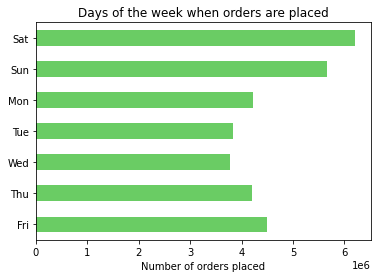

In [21]:
# Orders placed on each day of the week
data = ords_prods['order_day_of_week'].value_counts().sort_index(ascending=False).to_frame()
data = data.merge(days, how='inner', left_index=True, right_index=True).set_index('days')
bar_dow = data.plot.barh(color = sns.color_palette("muted")[2], 
                         legend=None)
plt.xlabel('Number of orders placed')
plt.ylabel('')
plt.title('Days of the week when orders are placed')

In [22]:
#checking the output
small['day_of_week'].value_counts(dropna=False)

Saturday     1241199
Sunday       1130517
Friday        898834
Monday        842805
Thursday      841845
Tuesday       768824
Wednesday     757451
Name: day_of_week, dtype: int64

In [23]:
small.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region,day_of_week
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Monday
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Busiest day,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Sunday
12,2398795,1,2,3,7,15.0,12424.0,3.0,1.0,Original Beef Jerky,23,19,4.398438,both,Low-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday
13,473747,1,3,3,12,21.0,12424.0,2.0,1.0,Original Beef Jerky,23,19,4.398438,both,Low-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday


In [24]:
# creating a spending flag High and Low spender
small['spending_flag'] = small['prices'].apply(lambda x: 'low spender' if x<8 else 'high spender')

C:\Users\iryna\AppData\Local\Temp\ipykernel_1176\3983017027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['spending_flag'] = small['prices'].apply(lambda x: 'low spender' if x<8 else 'high spender')


In [26]:
#checking the output
small.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region,day_of_week,spending_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Monday,high spender
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday,high spender
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy,Busiest day,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Sunday,high spender
12,2398795,1,2,3,7,15.0,12424.0,3.0,1.0,Original Beef Jerky,23,19,4.398438,both,Low-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday,low spender
13,473747,1,3,3,12,21.0,12424.0,2.0,1.0,Original Beef Jerky,23,19,4.398438,both,Low-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday,low spender


In [27]:
small['spending_flag'].value_counts(dropna=False)

low spender     3494637
high spender    2986838
Name: spending_flag, dtype: int64

In [43]:
# Creating a crosstab
crosstab_day_spending = pd.crosstab(small['order_day_of_week'], small['spending_flag'], dropna = False )

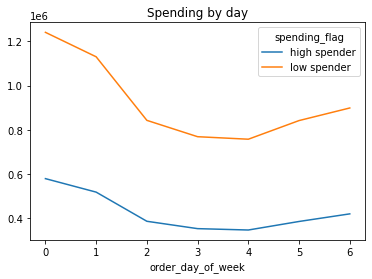

In [44]:
#Visualization spending by day
crosstab_day_spending = crosstab_day_spending.plot(kind = 'line', stacked = True, title = 'Spending by day')

In [45]:
#Exporting the visualization
crosstab_day_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f2_2_high_low_spender.png'))

In [46]:
# Creating a crosstab loyal customers and spending flag 
crosstab_loy_spend = pd.crosstab(small['loyalty_flag'], small['spending_flag'], dropna = False )

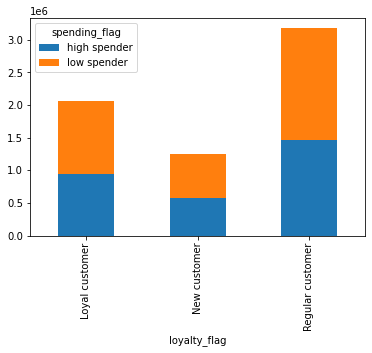

In [47]:
crosstab_loy_spend = crosstab_loy_spend.plot(kind = 'bar', stacked = True)

In [48]:
#Exporting the visualization
crosstab_day_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f6_1_loyal_high_low_spender.png'))

In [49]:
#creating a crosstab spending flag and age group
crosstab_age_spend = pd.crosstab(small['age_group'], small['spending_flag'], dropna = False )

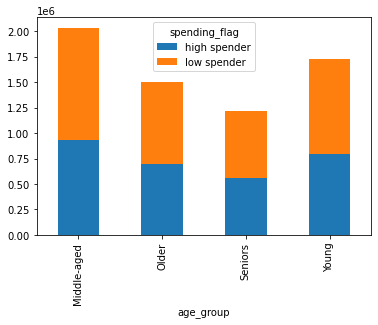

In [50]:
crosstab_age_spend = crosstab_age_spend.plot(kind = 'bar', stacked = True)

In [51]:
#Exporting the visualization
crosstab_day_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f8_1_agegroup_high_low_spender.png'))

### 04. Creating a product range and visualizations

In [56]:
# Creating product price range categories
small.loc[small['prices'] > 15, 'price_range_loc'] = 'High-range product'
small.loc[(small['prices'] <= 15) & (small['prices'] > 10), 'price_range_loc'] = 'Mid-high range' 
small.loc[(small['prices'] <= 10) & (small['prices'] > 5), 'price_range_loc'] = 'Mid-low range' 
small.loc[small['prices'] <= 5, 'price_range_loc'] = 'Low range product'

In [57]:
# Checking the output
small['price_range_loc'].value_counts(dropna=False)

Mid-low range         2351855
Low range product     2026337
Mid-high range        2019722
High-range product      83561
Name: price_range_loc, dtype: int64

In [58]:
small.shape

(6481475, 37)

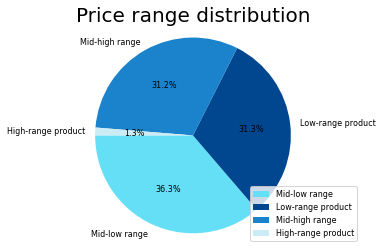

In [68]:
#pie chart for price range distribution
labels = 'Mid-low range', 'Low-range product', 'Mid-high range', 'High-range product'
sizes = small['price_range_loc'].value_counts()
colors = ['#65DFF6','#00478F','#1A83CC', '#CBEBF5']
textprops = {"fontsize":8}

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', startangle=180, textprops=textprops)
ax.axis('equal')
ax.set_title('Price range distribution', fontsize=20)

plt.legend(loc="lower right", fontsize=8)
plt.show()

In [69]:
# exporting price range pie chart
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f3_1_price_pie.png'))

### 05. Creating frequent customer flag and visualizations

In [70]:
# Derriving a column with frequency customer flag
small.loc[small['median_days_since_prior_order'] > 20, 'order_frequency_flag'] = 'Non-frequent customer'
small.loc[(small['median_days_since_prior_order'] > 10) & (small['median_days_since_prior_order'] <= 20), 'order_frequency_flag'] = 'Recurring customer'
small.loc[small['median_days_since_prior_order'] <= 10, 'order_frequency_flag'] = 'Frequent customer'

In [72]:
# Checking the output
small['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        4310393
Recurring customer       1443716
Non-frequent customer     727365
NaN                            1
Name: order_frequency_flag, dtype: int64

In [76]:
#creating crosstab frequency flag and region
crosstab_freq_spend = pd.crosstab(small['region'], small['order_frequency_flag'], dropna = False )

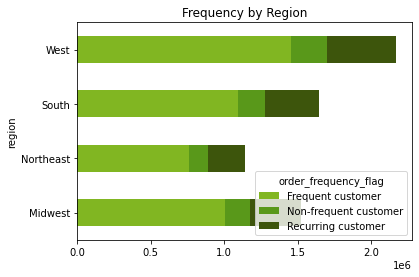

In [77]:
crosstab_freq_spend = crosstab_freq_spend.plot(kind = 'barh', stacked = True, color = ['#81B622','#59981A','#3D550C'], title = 'Frequency by Region')

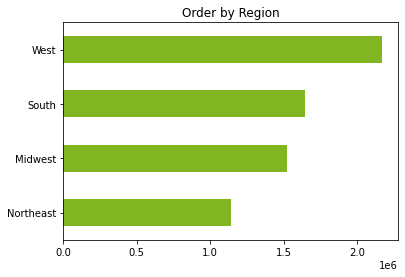

In [78]:
order_by_region = small['region'].value_counts().sort_values().plot.barh(color = '#81B622', title = 'Order by Region')

In [79]:
#exporting the bar chart
crosstab_freq_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fs7_2_region_frequency.png'))
order_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fs7_1_region_order.png'))

### 06. Creating stack bar charts

In [80]:
#100% stacked bar chart for days since prior order by loyalty flag

#creating crosstab for days since prior order and loyalty flag

days_loyalty = pd.crosstab(index=small['days_since_prior_order'], columns=small['loyalty_flag'], normalize="index")

#creating cross tab to display labels

days_loyalty_labels = pd.crosstab(index=small['days_since_prior_order'],columns=small['loyalty_flag'])

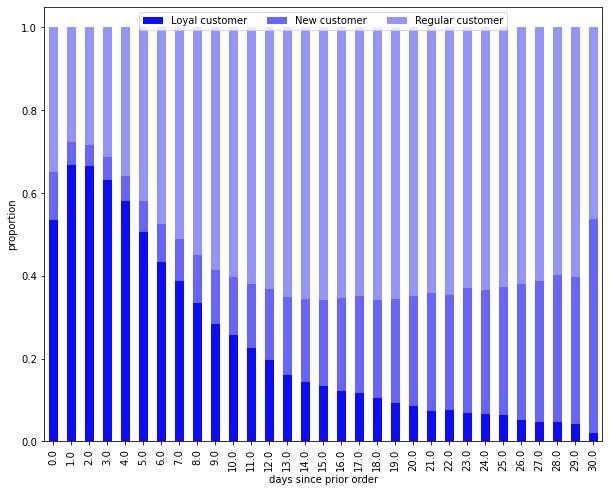

In [83]:
#plotting chart
days_loyalty_dist=days_loyalty.plot(kind='bar', 
                        stacked=True, 
                        color=['#0B0BFF','#6666FF','#9494FF'], 
                        figsize=(10,8))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("days since prior order")


plt.show()

In [84]:
#100% stacked bar chart for income level for each profile

#creating crosstab for income level and profile

profile_income = pd.crosstab(index=small['profile'], columns=small['income_level'], normalize="index")

#creating cross tab to display labels

profile_income_labels = pd.crosstab(index=small['profile'],columns=small['income_level'])

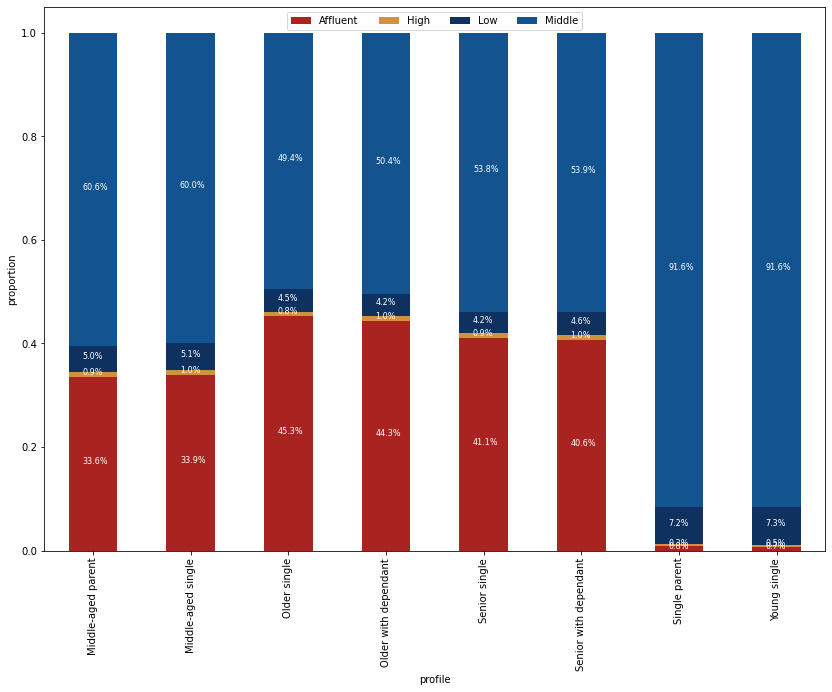

In [86]:
#plotting chart
profile_income_dist=profile_income.plot(kind='bar', 
                        stacked=True, 
                        color=['#A92420', '#D1913E', '#0E3160','#135390'], 
                        figsize=(14,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("profile")


for n, y in enumerate([*profile_income_labels.index.values]):
    for (proportion, count, x_loc) in zip(profile_income.loc[y],
                                         profile_income_labels.loc[y],
                                          profile_income.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,            
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=8)

plt.show()

In [87]:
#100% stacked bar chart for income level by age group

#creating crosstab for income level and age group

age_income = pd.crosstab(index=small['age_group'], columns=small['income_level'], normalize="index")

#creating cross tab to display labels

age_income_labels = pd.crosstab(index=small['age_group'],columns=small['income_level'])

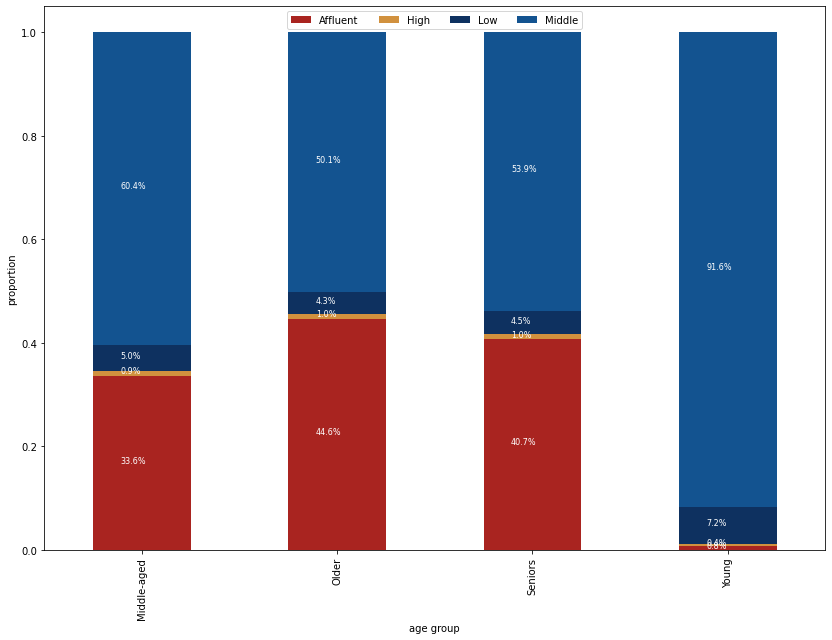

In [88]:
#plotting chart
age_income_dist=age_income.plot(kind='bar', 
                        stacked=True, 
                        color=['#A92420', '#D1913E', '#0E3160','#135390'], 
                        figsize=(14,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("age group")


for n, y in enumerate([*age_income_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_income.loc[y],
                                         age_income_labels.loc[y],
                                          age_income.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,            
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=8)

plt.show()

In [89]:
#100% stacked bar chart for income level by marital status

#creating crosstab for income level and marital status

marital_income = pd.crosstab(index=small['marital_status'], columns=small['income_level'], normalize="index")

#creating cross tab to display labels

marital_income_labels = pd.crosstab(index=small['marital_status'],columns=small['income_level'])

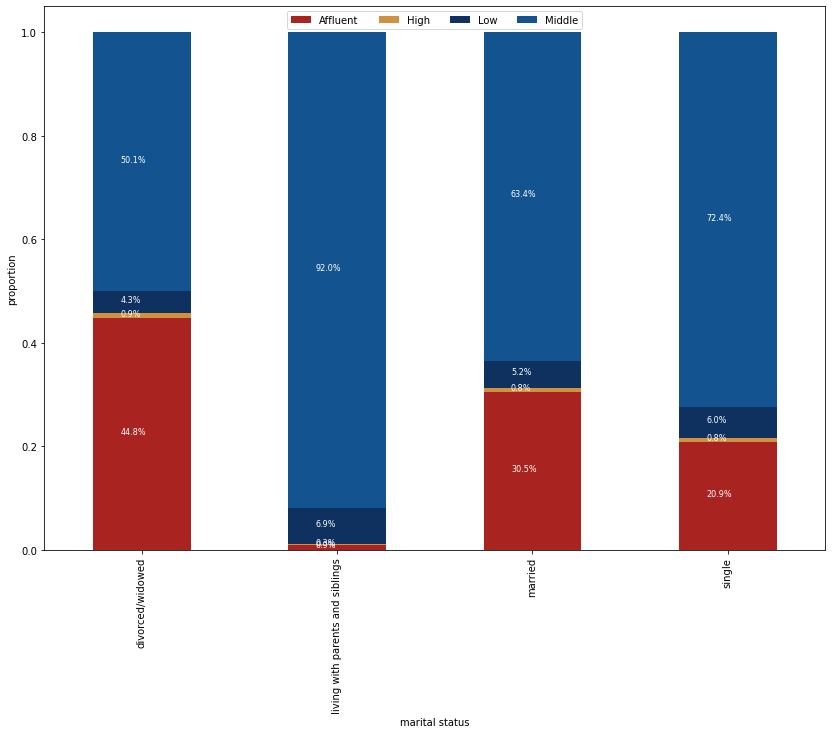

In [90]:
#plotting chart
marital_income_dist=marital_income.plot(kind='bar', 
                        stacked=True, 
                        color=['#A92420', '#D1913E', '#0E3160','#135390'], 
                        figsize=(14,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("marital status")


for n, y in enumerate([*marital_income_labels.index.values]):
    for (proportion, count, x_loc) in zip(marital_income.loc[y],
                                         marital_income_labels.loc[y],
                                          marital_income.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,            
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=8)

plt.show()

In [91]:
#importing departments dataset
departments=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [92]:
#creating data dictionary for department id
zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [93]:
# mapping  department names to department id in dataframe
small['department'] = small['department_id'].map(data_dict)
small.head()

C:\Users\iryna\AppData\Local\Temp\ipykernel_1176\2194054592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['department'] = small['department_id'].map(data_dict)


,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region,day_of_week,spending_flag,department
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.000000,both,Mid-low range,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Monday,high spender,beverages
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.000000,both,Mid-low range,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday,high spender,beverages
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,77,7,9.000000,both,Mid-low range,Regularly busy,Busiest day,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Sunday,high spender,beverages
12,2398795,1,2,3,7,15.0,12424.0,3.0,1.0,Original Beef Jerky,23,19,4.398438,both,Low range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday,low spender,snacks
13,473747,1,3,3,12,21.0,12424.0,2.0,1.0,Original Beef Jerky,23,19,4.398438,both,Low range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,Tuesday,low spender,snacks


In [94]:
#100% stacked bar chart for income level by department

#creating crosstab for income level and department

dep_income = pd.crosstab(index=small['department'], columns=small['income_level'], normalize="index")

#creating cross tab to display labels

dep_income_labels = pd.crosstab(index=small['department'],columns=small['income_level'])

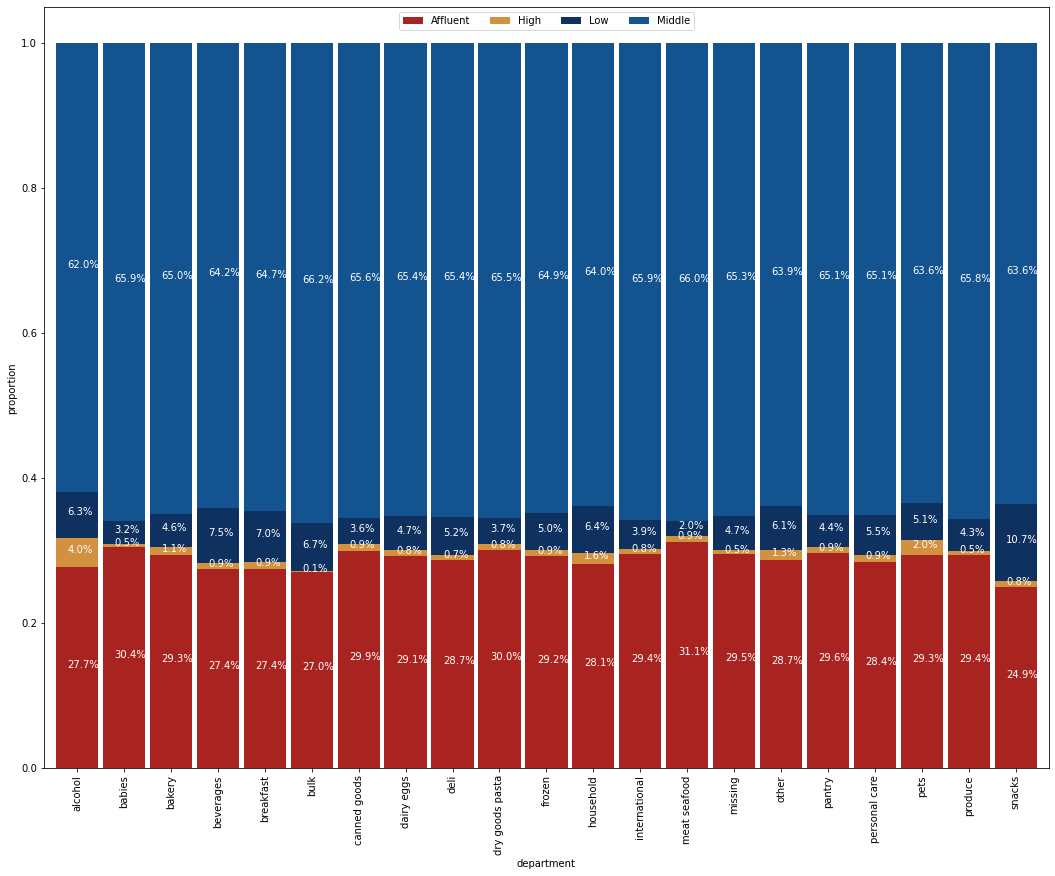

In [111]:
#plotting chart
dep_income_dist=dep_income.plot(kind='bar', 
                                width=(0.9),
                        stacked=True, 
                        color=['#A92420', '#D1913E', '#0E3160','#135390'], 
                        figsize=(18,14))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("department")


for n, y in enumerate([*dep_income_labels.index.values]):
    for (proportion, count, x_loc) in zip(dep_income.loc[y],
                                         dep_income_labels.loc[y],
                                          dep_income.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.2,            
                 s=f'{np.round(proportion * 100,1)}%', 
                 color="white",
                 fontsize=10)

plt.show()

### 07. Income level distribution

In [112]:
# Dictribution of income level
small['income_level'].value_counts(dropna=False)

Middle      4221717
Affluent    1862395
Low          345957
High          51406
Name: income_level, dtype: int64

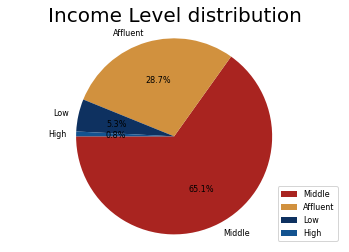

In [113]:
#pie chart for income level distribution
labels = 'Middle', 'Affluent', 'Low', 'High'
sizes = small['income_level'].value_counts()
colors = ['#A92420', '#D1913E', '#0E3160','#135390']
textprops = {"fontsize":8}

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', startangle=180, textprops=textprops)
ax.axis('equal')
ax.set_title('Income Level distribution', fontsize=20)

plt.legend(loc="lower right", fontsize=8)
plt.show()